## Problem Statement:
Global Mart is an online supergiant store that has worldwide operations. This store takes orders and delivers across the globe and deals with all the major product categories — consumer, corporate and home office.
As a sales manager for this store, you have to forecast the sales of the products for the next 6 months, so that you have a proper estimate and can plan your inventory and business processes accordingly.


In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# To Ignore warning messages on screen
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To read the Data Global market superstore data using Pandas
df=pd.read_csv('Global+Superstore+Data.csv')
df.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [3]:
# To get the Size of data set in terms of rows and columns
df.shape

(51290, 5)

In [4]:
# To check if any Missing values present in Global market data set
df.isnull().sum()

Order Date    0
Segment       0
Market        0
Sales         0
Profit        0
dtype: int64

#### Observation:
 No missing values were found in Global  Market data set.

In [5]:
#To display first 5 rows of given data set
df.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


### Data Preparation

In [6]:
# Converting the Order date into Year-Month format
df['Order Date'] = pd.to_datetime(df['Order Date']).dt.to_period('m')
df.head()

,Order Date,Segment,Market,Sales,Profit
0,2012-07,Consumer,US,2309.650,762.1845
1,2013-05,Corporate,APAC,3709.395,-288.7650
2,2013-10,Consumer,APAC,5175.171,919.9710
3,2013-01,Home Office,EU,2892.510,-96.5400
4,2013-05,Consumer,Africa,2832.960,311.5200


In [7]:
#To find the distinct Segements present in our dataset
df['Segment'].value_counts()

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

#### Observation:
 There are 3 Distinct Segments in data set.

In [8]:
#To find the ditinct Market in our Global Data set
df['Market'].value_counts()

APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64

#### Observation: 
 There are 7 Distinct Market categories in the data set.

In [9]:
# To find the Overall count of month
df['Order Date'].value_counts().shape

(48,)

#### Observation:
 We have 48 months of data provided for prediction of future Sales.

In [10]:
# To Aggregate the Segment and Market column 
df['Segment-Market']=df['Segment']+'-'+df['Market']

In [11]:
df['Segment-Market'].value_counts()
# To check the Distint Segment-market values present in our data set

Consumer-APAC         5699
Consumer-LATAM        5321
Consumer-US           5191
Consumer-EU           5186
Corporate-APAC        3283
Corporate-EU          3077
Corporate-LATAM       3053
Corporate-US          3020
Consumer-EMEA         2538
Consumer-Africa       2381
Home Office-APAC      2020
Home Office-LATAM     1920
Home Office-US        1783
Home Office-EU        1737
Corporate-EMEA        1574
Corporate-Africa      1312
Home Office-EMEA       917
Home Office-Africa     894
Consumer-Canada        202
Corporate-Canada       110
Home Office-Canada      72
Name: Segment-Market, dtype: int64

In [12]:
df.head()
# To display first 5 rows after concatenation

,Order Date,Segment,Market,Sales,Profit,Segment-Market
0,2012-07,Consumer,US,2309.650,762.1845,Consumer-US
1,2013-05,Corporate,APAC,3709.395,-288.7650,Corporate-APAC
2,2013-10,Consumer,APAC,5175.171,919.9710,Consumer-APAC
3,2013-01,Home Office,EU,2892.510,-96.5400,Home Office-EU
4,2013-05,Consumer,Africa,2832.960,311.5200,Consumer-Africa


In [13]:
# Aggregate the data on year-month and market-seg to find the most profitable market Segement
dfag = df.pivot_table(index = 'Order Date', values = 'Profit', columns = 'Segment-Market', aggfunc = 'sum')

In [14]:
dfag.head()
#Display first 5 rows of aggregated data

Segment-Market,Consumer-APAC,Consumer-Africa,Consumer-Canada,Consumer-EMEA,Consumer-EU,Consumer-LATAM,Consumer-US,Corporate-APAC,Corporate-Africa,Corporate-Canada,...,Corporate-EU,Corporate-LATAM,Corporate-US,Home Office-APAC,Home Office-Africa,Home Office-Canada,Home Office-EMEA,Home Office-EU,Home Office-LATAM,Home Office-US
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,265.539,447.33,-2952.594,2259.8670,540.44312,2465.8368,-173.7264,520.026,12.57,...,841.3875,1021.05924,643.3689,230.2656,391.515,NaN,392.526,2534.568,-26.59744,1233.9329
2011-02,4627.8531,-201.888,26.43,464.160,-783.9945,1227.86616,1853.5541,3600.7776,-31.689,9.24,...,2234.4060,814.03020,421.9256,617.5407,825.606,87.99,368.070,162.255,-356.80440,553.9467
2011-03,2337.8319,919.074,82.47,706.380,1273.7100,2427.39612,204.2007,3634.9365,244.437,NaN,...,2206.5960,178.66400,127.4696,205.1052,83.430,84.03,-15.570,269.745,769.88400,-268.9314
2011-04,633.6423,381.315,55.08,121.353,2980.0065,1368.82948,1434.8636,90.7521,941.751,6.51,...,981.1470,872.64068,494.7315,603.8478,417.618,NaN,-456.510,130.371,-554.22952,2723.4358
2011-05,3838.9500,-39.981,0.87,172.554,673.0080,1749.39200,833.9433,1028.4489,490.650,NaN,...,1719.0600,134.87252,2912.7976,102.0315,39.180,NaN,-33.591,443.310,-397.95600,145.7781


In [15]:
# To check the size of aggreagated data frame in terms of Rows and column
dfag.shape

(48, 21)

In [16]:
#To Split the data into train-test data set
train_len = 42
train_df = dfag[0:train_len]
test_df = dfag[train_len:]

#### Observation:
 As per problem statement, first 42 months of Data is taken as Train Data and remaining 6 months data is considered as Test Data set.


In [17]:
#To display the first 5 rows in Train data set
train_df.head()

Segment-Market,Consumer-APAC,Consumer-Africa,Consumer-Canada,Consumer-EMEA,Consumer-EU,Consumer-LATAM,Consumer-US,Corporate-APAC,Corporate-Africa,Corporate-Canada,...,Corporate-EU,Corporate-LATAM,Corporate-US,Home Office-APAC,Home Office-Africa,Home Office-Canada,Home Office-EMEA,Home Office-EU,Home Office-LATAM,Home Office-US
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,265.539,447.33,-2952.594,2259.8670,540.44312,2465.8368,-173.7264,520.026,12.57,...,841.3875,1021.05924,643.3689,230.2656,391.515,NaN,392.526,2534.568,-26.59744,1233.9329
2011-02,4627.8531,-201.888,26.43,464.160,-783.9945,1227.86616,1853.5541,3600.7776,-31.689,9.24,...,2234.4060,814.03020,421.9256,617.5407,825.606,87.99,368.070,162.255,-356.80440,553.9467
2011-03,2337.8319,919.074,82.47,706.380,1273.7100,2427.39612,204.2007,3634.9365,244.437,NaN,...,2206.5960,178.66400,127.4696,205.1052,83.430,84.03,-15.570,269.745,769.88400,-268.9314
2011-04,633.6423,381.315,55.08,121.353,2980.0065,1368.82948,1434.8636,90.7521,941.751,6.51,...,981.1470,872.64068,494.7315,603.8478,417.618,NaN,-456.510,130.371,-554.22952,2723.4358
2011-05,3838.9500,-39.981,0.87,172.554,673.0080,1749.39200,833.9433,1028.4489,490.650,NaN,...,1719.0600,134.87252,2912.7976,102.0315,39.180,NaN,-33.591,443.310,-397.95600,145.7781


In [18]:
#To display the Test data set having 6 rows in total
test_df

Segment-Market,Consumer-APAC,Consumer-Africa,Consumer-Canada,Consumer-EMEA,Consumer-EU,Consumer-LATAM,Consumer-US,Corporate-APAC,Corporate-Africa,Corporate-Canada,...,Corporate-EU,Corporate-LATAM,Corporate-US,Home Office-APAC,Home Office-Africa,Home Office-Canada,Home Office-EMEA,Home Office-EU,Home Office-LATAM,Home Office-US
Order Date,,,,,,,,,,,,,,,,,,,,,
2014-07,1415.0049,472.287,NaN,463.194,4224.1095,126.17668,1171.6925,3330.4251,389.322,65.10,...,3842.6700,1333.21772,2941.9503,2642.6874,795.960,10.80,1530.378,-1625.1780,1443.44916,1587.7943
2014-08,4405.5609,1848.834,617.01,1485.804,7316.4210,5135.04420,2806.9233,1623.9069,112.041,58.95,...,8370.2250,489.52444,3284.5880,1059.0081,1717.773,110.22,423.114,1471.8645,1142.49640,1168.9436
2014-09,4342.6419,2915.433,25.20,2444.796,5405.8485,4382.15812,4401.4550,4419.9804,350.439,128.04,...,4341.1080,1914.78796,5156.8145,7389.1881,499.089,63.48,-471.552,880.9695,1428.99836,2788.8755
2014-10,7997.8092,745.929,3.30,2005.428,6641.0205,4068.74672,2515.7175,4371.8221,2501.847,390.51,...,4256.6745,2687.02280,2505.4306,4151.0742,-1130.139,NaN,337.764,1480.4205,2149.39528,4104.2505
2014-11,13773.4995,1689.360,236.13,432.399,1635.9270,4208.42260,5981.7104,5588.2947,-381.669,104.13,...,5266.0665,1813.60880,2812.3922,3526.9944,2001.189,86.64,837.063,3157.5615,1342.24256,493.4159
2014-12,6045.4858,-123.438,208.53,894.621,8065.3410,6299.04436,4398.5922,2256.1737,385.047,1196.40,...,4232.6595,2486.67296,1601.5969,1210.5924,685.410,NaN,-243.990,3955.2420,1255.79648,2608.6367


In [19]:
#To find the Co-Variance on Profit for each of the 21 market segments
cov_df = pd.DataFrame(columns = ['segment', 'cov'])
# As part of the step, we are creating an empty Data Frame


In [20]:
cov_df

,segment,cov


In [21]:
train_df.head()

Segment-Market,Consumer-APAC,Consumer-Africa,Consumer-Canada,Consumer-EMEA,Consumer-EU,Consumer-LATAM,Consumer-US,Corporate-APAC,Corporate-Africa,Corporate-Canada,...,Corporate-EU,Corporate-LATAM,Corporate-US,Home Office-APAC,Home Office-Africa,Home Office-Canada,Home Office-EMEA,Home Office-EU,Home Office-LATAM,Home Office-US
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,265.539,447.33,-2952.594,2259.8670,540.44312,2465.8368,-173.7264,520.026,12.57,...,841.3875,1021.05924,643.3689,230.2656,391.515,NaN,392.526,2534.568,-26.59744,1233.9329
2011-02,4627.8531,-201.888,26.43,464.160,-783.9945,1227.86616,1853.5541,3600.7776,-31.689,9.24,...,2234.4060,814.03020,421.9256,617.5407,825.606,87.99,368.070,162.255,-356.80440,553.9467
2011-03,2337.8319,919.074,82.47,706.380,1273.7100,2427.39612,204.2007,3634.9365,244.437,NaN,...,2206.5960,178.66400,127.4696,205.1052,83.430,84.03,-15.570,269.745,769.88400,-268.9314
2011-04,633.6423,381.315,55.08,121.353,2980.0065,1368.82948,1434.8636,90.7521,941.751,6.51,...,981.1470,872.64068,494.7315,603.8478,417.618,NaN,-456.510,130.371,-554.22952,2723.4358
2011-05,3838.9500,-39.981,0.87,172.554,673.0080,1749.39200,833.9433,1028.4489,490.650,NaN,...,1719.0600,134.87252,2912.7976,102.0315,39.180,NaN,-33.591,443.310,-397.95600,145.7781


In [22]:
# To find the Co-variance for each the Seegment-market in our dtaa set
for i in train_df.columns:
    temp={'segment':i,'cov':np.std(train_df[i])/np.mean(train_df[i])}
    cov_df=cov_df.append(temp,ignore_index=True)

In [23]:
# To display the Covariance value for all 21 Market Segments
cov_df

,segment,cov
0,Consumer-APAC,0.522725
1,Consumer-Africa,1.310351
2,Consumer-Canada,1.250315
3,Consumer-EMEA,2.652495
4,Consumer-EU,0.595215
5,Consumer-LATAM,0.683770
6,Consumer-US,1.010530
7,Corporate-APAC,0.530051
8,Corporate-Africa,1.891744
9,Corporate-Canada,1.786025


#### Observation:
1. There are in total 21 Distinct Market Segements (as above) and out of which 'Consumer-APAC' Market Segment is having the least value of Covarinace.
2. Thus, based on Covraince value we can say that 'Consumer-APAC' is the most Consistent Market Segment.

### Model Building and Evaluation

In [24]:
# Filter tha data with Most Consistant Market-Segment
df_f=df[df['Segment-Market']=='Consumer-APAC']
df_f.head()

,Order Date,Segment,Market,Sales,Profit,Segment-Market
2,2013-10,Consumer,APAC,5175.171,919.971,Consumer-APAC
6,2011-07,Consumer,APAC,1822.080,564.840,Consumer-APAC
7,2012-04,Consumer,APAC,5244.840,996.480,Consumer-APAC
14,2013-06,Consumer,APAC,3701.520,1036.080,Consumer-APAC
29,2012-02,Consumer,APAC,1878.720,582.360,Consumer-APAC


In [25]:
# To check the Size of Orders for Segement-Market column as  'Consumer-APAC'
df_f.shape

(5699, 6)

In [26]:
# Considering the Order Date along with Sales on the given Month and year
df_f=df_f[['Order Date','Sales']]
df_f.head()

,Order Date,Sales
2,2013-10,5175.171
6,2011-07,1822.080
7,2012-04,5244.840
14,2013-06,3701.520
29,2012-02,1878.720


In [27]:
df_f

,Order Date,Sales
2,2013-10,5175.1710
6,2011-07,1822.0800
7,2012-04,5244.8400
14,2013-06,3701.5200
29,2012-02,1878.7200
...,...,...
51215,2013-01,38.9709
51234,2014-12,6.9000
51235,2011-03,17.2800
51236,2013-07,30.6180


In [28]:
#Aggregating the data based on Order date column and making it as as Index Column
df_f=df_f.groupby('Order Date').sum()

In [29]:
df_f.head()

,Sales
Order Date,
2011-01,18821.9898
2011-02,23313.3531
2011-03,26518.4919
2011-04,12046.0923
2011-05,25941.9000


In [30]:
df_f.shape
# We have data available for 48 months  out of which we be Splitting into train and testdata set for prediction in forthcomig steps


(48, 1)

#### Visualising Sales diustribution

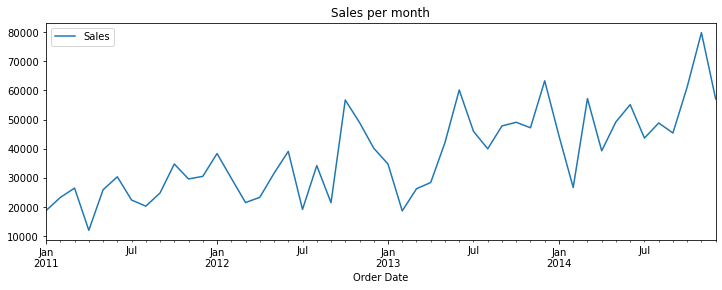

In [31]:
df_f.plot(figsize=(12,4))
plt.title('Sales per month')
plt.show()

#### Observation:
1. The graph captures an Overall Upward Trend in Sales per month.
2. It also captures the Seasonality with repetitive pattern.

In [32]:
df_f.head()

,Sales
Order Date,
2011-01,18821.9898
2011-02,23313.3531
2011-03,26518.4919
2011-04,12046.0923
2011-05,25941.9000


In [33]:
# Now again doing the Train-test split

In [34]:
# Converting Order date from Year-month to date timeStamp format
df_f=df_f.to_timestamp()

In [35]:
df_f.head()
# To dispaly updated data frame with Order date in date format

,Sales
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000


In [36]:
df_f.shape
# To check the size of data frame

(48, 1)

In [37]:
#Performing Train-Test Split
train_len = 42
train= df_f[0:train_len]
test = df_f[train_len:]

In [38]:
train.head()


,Sales
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000


#### Observation:
 Train data set contains 42 months of data,which would be needed for model builing ad predicting the Sales future.

In [39]:
test
# Test data set contains last 6 months data from data set

,Sales
Order Date,
2014-07-01,43672.0749
2014-08-01,48848.3409
2014-09-01,45424.3119
2014-10-01,61221.9792
2014-11-01,79834.4295
2014-12-01,57099.9858


### Data Forecasting methods

### Naive method

In [40]:
y_hat_naive=test.copy()
y_hat_naive['naive_forecast']=train['Sales'][train_len-1]

In [41]:
y_hat_naive
# It contains the Sales and  forcasted sales using naive method for 6 months

,Sales,naive_forecast
Order Date,,
2014-07-01,43672.0749,55151.4699
2014-08-01,48848.3409,55151.4699
2014-09-01,45424.3119,55151.4699
2014-10-01,61221.9792,55151.4699
2014-11-01,79834.4295,55151.4699
2014-12-01,57099.9858,55151.4699


#### Plotting  Train & Test forecast for Naive method

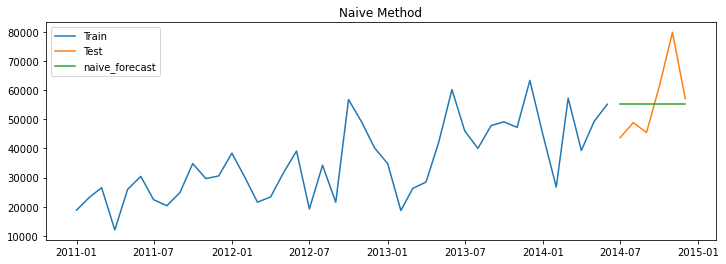

In [42]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'],label='Train')
plt.plot(test['Sales'],label='Test')
plt.plot(y_hat_naive['naive_forecast'],label='naive_forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

#### Observation:
1. Here , the Green Straight line parallel to axis represents the Naive forrecast for 6 months duration.
2. In Naive Method, Sales is predicted based on the Last Months Sale.
3. It captures only the LEVEL with the forecast value as 55151.4699.



####  MAPE for Naive method

In [43]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(test['Sales'],y_hat_naive['naive_forecast'])).round(2)
mape=np.round(np.mean(np.abs(test['Sales']-y_hat_naive['naive_forecast'])/test['Sales'])*100,2)

results=pd.DataFrame({'Method':['Naive Method'],'MAPE':[mape]})
results=results[['Method','MAPE']]
results

,Method,MAPE
0,Naive Method,17.47


#### Observation:
 We calculated the MAPE value for Naive method.

### Simple Average method

In [44]:
y_hat_avg=test.copy()
y_hat_avg['avg_forecast']=train['Sales'].mean()

In [45]:
y_hat_avg
# It contains Sales and forcasted Sales using Simplae Average method

,Sales,avg_forecast
Order Date,,
2014-07-01,43672.0749,35253.632814
2014-08-01,48848.3409,35253.632814
2014-09-01,45424.3119,35253.632814
2014-10-01,61221.9792,35253.632814
2014-11-01,79834.4295,35253.632814
2014-12-01,57099.9858,35253.632814


#### Plotting Train & Test forecast for Simple Average method

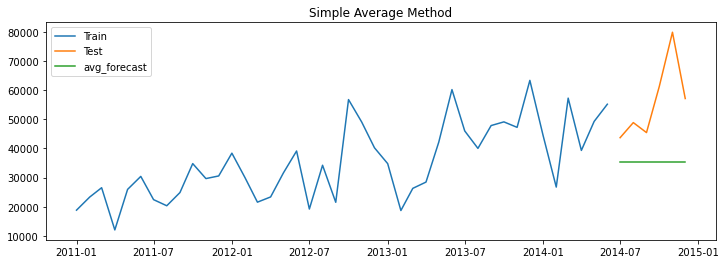

In [46]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'],label='Train')
plt.plot(test['Sales'],label='Test')
plt.plot(y_hat_avg['avg_forecast'],label='avg_forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

#### Observation:
1. Here , the Green Straight line parallel to axis represents the Simple Average forecast for 6 months duration.
2. In Simple Average Method, Predicted Sales is  the Average of all the previous months Train data.
3. It capturesthe LEVEL of average values with forecast value as 35253.632814.

#### Calculate MAPE value for Simple Average method

In [47]:
rmse=np.sqrt(mean_squared_error(test['Sales'],y_hat_avg['avg_forecast'])).round(2)
mape=np.round(np.mean(np.abs(test['Sales']-y_hat_avg['avg_forecast'])/test['Sales'])*100,2)

tempResults=pd.DataFrame({'Method':['Simple Average Method'],'MAPE':[mape]})
results=pd.concat([results,tempResults])
results

,Method,MAPE
0,Naive Method,17.47
0,Simple Average Method,34.34


#### Observation:
1. MAPE value of Simple Average Method is greater than Naive method in this case.
2. It means Naive method is better amoing these two methods for the current problem statement.

### Simple Moving Average method

In [48]:
y_hat_sma=df_f.copy()
ma_window=12
# Considering Wondow size of 12
y_hat_sma['sma_forecast']=df_f['Sales'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:]=y_hat_sma['sma_forecast'][train_len-1]


#### Plotting Train & Test forecast for Simple Moving Average method

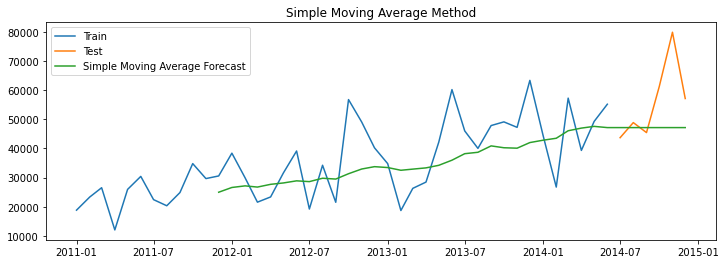

In [49]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'],label='Train')
plt.plot(test['Sales'],label='Test')
plt.plot(y_hat_sma['sma_forecast'],label='Simple Moving Average Forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

#### Observation:
1. Here , the Green line represents the Simple Moving Average.
2. In Simple Moving Average Method, we have taken Moving window size of 12 months.
   Predicted Sales is  the Average of  moving 12 months Train data window.
3. It gives importance to the weight of each window and captures the increasing Trend.

#### Calculate MAPE value for Simple Moving Average method

In [50]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(test['Sales'],y_hat_sma['sma_forecast'][train_len:])).round(2)
mape=np.round(np.mean(np.abs(test['Sales']-y_hat_sma['sma_forecast'][train_len:])/test['Sales'])*100,2)

tempResults=pd.DataFrame({'Method':['Simple Moving Average Method'],'MAPE':[mape]})
results=pd.concat([results,tempResults])
results

,Method,MAPE
0,Naive Method,17.47
0,Simple Average Method,34.34
0,Simple Moving Average Method,16.10


### Simple Exponential Smoothing

In [51]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model=SimpleExpSmoothing(train['Sales'])
model_fit=model.fit(optimized=True)
model_fit.params
y_hat_ses=test.copy()
y_hat_ses['ses_forecast']=model_fit.forecast(6)
#creating seasonal forecast for 6 months

#### Plotting Train & Test forecast for Simple Expoenential Smoothing method

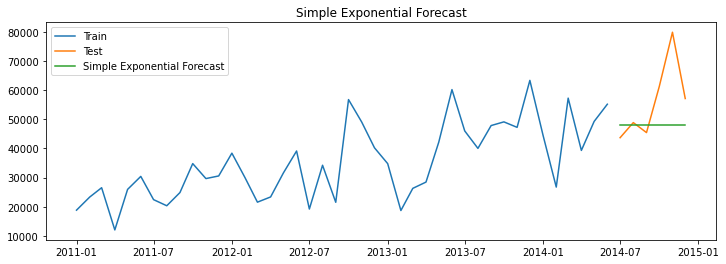

In [52]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'],label='Train')
plt.plot(test['Sales'],label='Test')
plt.plot(y_hat_ses['ses_forecast'],label='Simple Exponential Forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Forecast')
plt.show()

#### Observation:
1. Here , the Green line parallel to axis represents the Simple Exponential Smoothing.
2. In Simple Exponential Smoothing Method, most recent value gets the Higher weight while,
   the Older values gets the lower weight assigned to them.
3. It captures only the LEVEL of Data, by moving Averge window with higher weightage
    to closest/latest data than older/past data.


#### Calculate MAPE value for Simple Exponential Smoothing method

In [53]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(test['Sales'],y_hat_ses['ses_forecast'])).round(2)
mape=np.round(np.mean(np.abs(test['Sales']-y_hat_ses['ses_forecast'])/test['Sales'])*100,2)

tempResults=pd.DataFrame({'Method':['Simple Exponential Smoothing'],'MAPE':[mape]})
results=pd.concat([results,tempResults])
results

,Method,MAPE
0,Naive Method,17.47
0,Simple Average Method,34.34
0,Simple Moving Average Method,16.10
0,Simple Exponential Smoothing,15.83


### Holt method

In [54]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model=ExponentialSmoothing(np.asarray(train['Sales']),seasonal_periods=12,trend='additive',seasonal=None)
model_fit=model.fit(optimized=True)
print(model_fit.params)
y_hat_holt=test.copy()
y_hat_holt['holt_forecast']=model_fit.forecast(6)


{'smoothing_level': 4.9871463551099955e-06, 'smoothing_slope': 4.983730054348859e-06, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 19518.11808456267, 'initial_slope': 732.447409703522, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\d947438\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


#### Plotting Train & Test forecast for Holt method

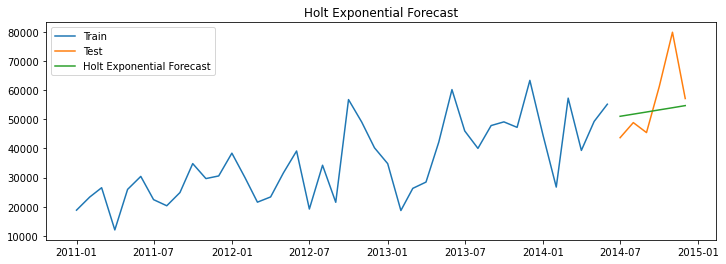

In [55]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'],label='Train')
plt.plot(test['Sales'],label='Test')
plt.plot(y_hat_holt['holt_forecast'],label='Holt Exponential Forecast')
plt.legend(loc='best')
plt.title('Holt Exponential Forecast')
plt.show()

#### Observation:
1. Here, the Green line represent an Upward trend which is Holts Exponential Foreact.
2. It captures both LEVEL as well as TREND , in the forecast.
3. An upward  increasing trend and level is captured as part of the model.

#### Calculate MAPE value for Holt method

In [56]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(test['Sales'],y_hat_holt['holt_forecast'])).round(2)
mape=np.round(np.mean(np.abs(test['Sales']-y_hat_holt['holt_forecast'])/test['Sales'])*100,2)

tempResults=pd.DataFrame({'Method':['HOLT Exponential Forecast'],'MAPE':[mape]})
results=pd.concat([results,tempResults])
results

,Method,MAPE
0,Naive Method,17.47
0,Simple Average Method,34.34
0,Simple Moving Average Method,16.10
0,Simple Exponential Smoothing,15.83
0,HOLT Exponential Forecast,14.67


#### Observation:
 Based on MAPE value, we can say that Holt Exponential Forecast method is performing better than other previous models.


### Holt Winters Additive method

In [57]:
y_hat_hws=test.copy()
model=ExponentialSmoothing(np.asarray(train['Sales']),seasonal_periods=12,trend='add',seasonal='add')
model_fit=model.fit(optimized=True)
print(model_fit.params)
y_hat_hws['hws_forecast']=model_fit.forecast(6)


{'smoothing_level': 0.0010509388141032566, 'smoothing_slope': 0.0010509370471667254, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 29624.549305629498, 'initial_slope': 726.1284148593357, 'initial_seasons': array([-10914.24574131, -18060.72464413, -11449.93813176, -20493.07274934,
        -9073.31688794,  -1568.37326276, -13896.80392851, -13464.39086896,
       -12517.80722356,    690.05605158,  -4713.05363924,  -3071.06327142]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\d947438\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


#### Plotting Train & Test forecast for Holt Winters Additive method

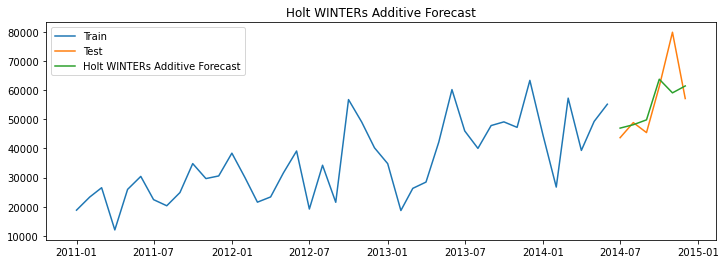

In [58]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'],label='Train')
plt.plot(test['Sales'],label='Test')
plt.plot(y_hat_hws['hws_forecast'],label='Holt WINTERs Additive Forecast')
plt.legend(loc='best')
plt.title('Holt WINTERs Additive Forecast')
plt.show()

#### Observation:
1. Here the Green line , represents the Holts Winter Additive forecast, obtained by following an Additive approach.
2. We have captured the Level and an Upward Increasing Trend  and Seasonality, whihc is quite close to actual Test data.


#### Calculate MAPE value for Holt Winters Additive method

In [59]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(test['Sales'],y_hat_hws['hws_forecast'])).round(2)
mape=np.round(np.mean(np.abs(test['Sales']-y_hat_hws['hws_forecast'])/test['Sales'])*100,2)

tempResults=pd.DataFrame({'Method':['Holt WINTERs Additive Forecast'],'MAPE':[mape]})
results=pd.concat([results,tempResults])
results

,Method,MAPE
0,Naive Method,17.47
0,Simple Average Method,34.34
0,Simple Moving Average Method,16.10
0,Simple Exponential Smoothing,15.83
0,HOLT Exponential Forecast,14.67
0,Holt WINTERs Additive Forecast,9.39


#### Observation:
1. Holts Winter Additive is having least MAPE value and is perfoming better than previous Forecast models.

### Holt Winters Multiplicative method

In [60]:
y_hat_hwm=test.copy()
model=ExponentialSmoothing(np.asarray(train['Sales']),seasonal_periods=12,trend='add',seasonal='mul')
model_fit=model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hwm_forecast']=model_fit.forecast(6)
#forecast data for next 6 months

{'smoothing_level': 9.582290725204863e-05, 'smoothing_slope': 9.582087430729273e-05, 'smoothing_seasonal': 0.0002891739565279278, 'damping_slope': nan, 'initial_level': 34110.96530959016, 'initial_slope': 730.416973137932, 'initial_seasons': array([0.71599532, 0.48679565, 0.68350968, 0.53337241, 0.73927219,
       0.90249673, 0.62362308, 0.656219  , 0.6490747 , 0.93258796,
       0.82846243, 0.88581098]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\d947438\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


#### Plotting Train & Test forecast for Holt Winters Multiplicative method

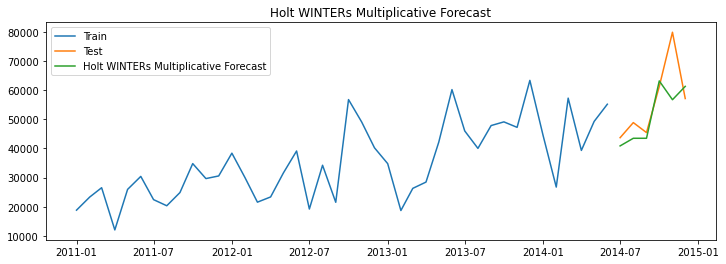

In [61]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'],label='Train')
plt.plot(test['Sales'],label='Test')
plt.plot(y_hat_hwm['hwm_forecast'],label='Holt WINTERs Multiplicative Forecast')
plt.legend(loc='best')
plt.title('Holt WINTERs Multiplicative Forecast')
plt.show()

#### Observation:
1. Here, Green Line is the Holts Winter Multiplicative forecast .
2. It captures the Trend and level and Seasonality using Multiplicative approach in calculation.
3. We observe the Forecast value is quite close to the test data.

#### Calculate MAPE value for Holt Winters Multiplicative method

In [62]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(test['Sales'],y_hat_hwm['hwm_forecast'])).round(2)
mape=np.round(np.mean(np.abs(test['Sales']-y_hat_hwm['hwm_forecast'])/test['Sales'])*100,2)

tempResults=pd.DataFrame({'Method':['Holt WINTERs Multiplicative Forecast'],'MAPE':[mape]})
results=pd.concat([results,tempResults])
results

,Method,MAPE
0,Naive Method,17.47
0,Simple Average Method,34.34
0,Simple Moving Average Method,16.10
0,Simple Exponential Smoothing,15.83
0,HOLT Exponential Forecast,14.67
0,Holt WINTERs Additive Forecast,9.39
0,Holt WINTERs Multiplicative Forecast,10.20


### Auto Regressive (AR) model

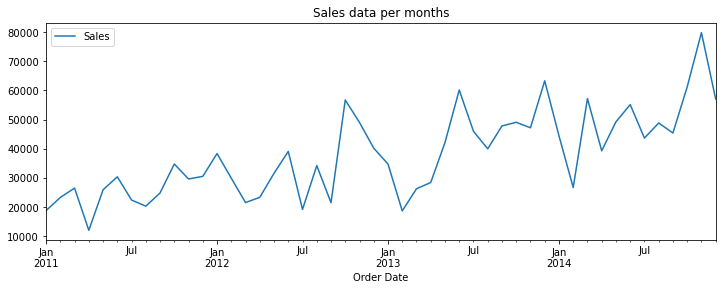

In [63]:
df_f['Sales'].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Sales data per months')
plt.show()

#### Observation: 
 Sales data captured per month with an Increasing Upwardc Trend overall.

#### Augmented Dicky-Fuller (ADF) test: To test the Stationarity of Time Series

In [64]:
from statsmodels.tsa.stattools import adfuller
adf_test=adfuller(df_f['Sales'])
adf_test

(-3.3760244736258023,
 0.011803859657119784,
 0,
 47,
 {'1%': -3.5778480370438146,
  '5%': -2.925338105429433,
  '10%': -2.6007735310095064},
 804.80930070885)

In [65]:
print('ADF statistic: %f' %adf_test[0])
print('Critical value @ 0.05: %.2f' %adf_test[4]['5%'])
print('p-value: %f' %adf_test[1])


ADF statistic: -3.376024
Critical value @ 0.05: -2.93
p-value: 0.011804


#### Observation:
1. In ADF test:
* For Null Hypothesis(H0)  Time Series is non-Stationary when p-value>0.05 and
* For Alternate Hypothesis(H1) Time Series is Stationary when p-value<=0.05

2. In our case,as p-value <0.05, we reject the Null Hypothesis, TS Stationary.

    

### KPSS ( Kwiatkowski–Phillips–Schmidt–Shin)  test

In [66]:
from statsmodels.tsa.stattools import kpss
kpss_test=kpss(df_f['Sales'])

kpss_test

(0.5770764651955996,
 0.024720321345854578,
 10,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [67]:
print('KPSS statistic %f' % kpss_test[0])
print('Critical value @ 0.05: %.2f' %kpss_test[3]['5%'])
print('p-value: %f' %kpss_test[1])

KPSS statistic 0.577076
Critical value @ 0.05: 0.46
p-value: 0.024720


#### Observation:
1. In KPSS test:
- For Null Hypothesis(H0)  Time Series is Stationary when p-value>0.05 and
- For Alternate Hypothesis(H1) Time Series is non Stationary when p-value<=0.05

2. In our case,as p-value <0.05, we reject the Null Hypothesis and TS is non-Stationary.


### Boxcox Transformation method

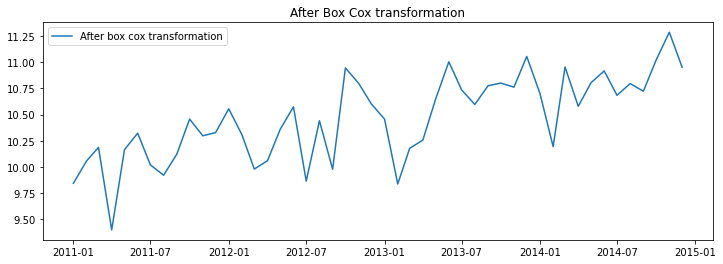

In [68]:
# BOX COX used for Transformation of data
from scipy.stats import boxcox
df_boxcox=pd.Series(boxcox(df_f['Sales'],lmbda=0),index=df_f.index)

plt.figure(figsize=(12,4))
plt.plot(df_boxcox,label='After box cox transformation')
plt.legend(loc='best')
plt.title('After Box Cox transformation')
plt.show()


#### Observation:
1. Using Box Cox Transformation, Variance is made Constant.
2. It helps in converting Non-Stationary Time Series into Stationary Time series.


In [69]:
df_boxcox.head()

Order Date
2011-01-01     9.842781
2011-02-01    10.056782
2011-03-01    10.185598
2011-04-01     9.396496
2011-05-01    10.163615
Freq: MS, dtype: float64

#### Differencing Method

In [70]:
df_boxcox_diff=pd.Series(df_boxcox-df_boxcox.shift(),index=df_f.index)
df_boxcox_diff.head()

Order Date
2011-01-01         NaN
2011-02-01    0.214000
2011-03-01    0.128816
2011-04-01   -0.789102
2011-05-01    0.767119
Freq: MS, dtype: float64

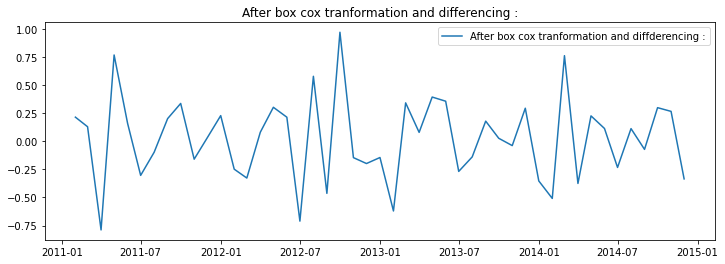

In [71]:
df_boxcox_diff=pd.Series(df_boxcox-df_boxcox.shift(),index=df_f.index)
df_boxcox_diff.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(df_boxcox_diff,label='After box cox tranformation and diffderencing :')
plt.legend(loc='best')
plt.title('After box cox tranformation and differencing :')
plt.show()


#### Observation:
1. Differencing is used to make then Mean Constant for given data.
2. It help to convert make Non-Stationary series into Stationary Time Series.

#### Augmented Dicky-Fuller (ADF) test: To test the Stationarity of Time Series after Conversion

In [72]:
adf_test

(-3.3760244736258023,
 0.011803859657119784,
 0,
 47,
 {'1%': -3.5778480370438146,
  '5%': -2.925338105429433,
  '10%': -2.6007735310095064},
 804.80930070885)

In [73]:
adf_test=adfuller(df_boxcox_diff)

print('ADF statistic %f' % adf_test[0])
print('Critical value @ 0.05: %f.2' %adf_test[4]['5%'])
print('p-value: %f' %adf_test[1])


ADF statistic -4.535011
Critical value @ 0.05: -2.945951.2
p-value: 0.000170


#### Observation:
1. In ADF test:
- For Null Hypothesis(H0)  Time Series is non-Stationary when p-value>0.05 and
- For Alternate Hypothesis(H1) Time Series is Stationary when p-value<=0.05

2. In our case,as p-value <0.05, we reject the Null Hypothesis thus, TS Stationary.



#### KPSS Test

In [74]:
kpss_test=kpss(df_boxcox_diff)

C:\Users\d947438\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [75]:
print('KPSS statistic %f' % kpss_test[0])
print('Critical value @ 0.05: %.2f' %kpss_test[3]['5%'])
print('p-value: %f' %kpss_test[1])

KPSS statistic 0.156456
Critical value @ 0.05: 0.46
p-value: 0.100000


#### Observation:
1. In KPSS test:
- For Null Hypothesis(H0)  Time Series is Stationary when p-value>0.05 and
- For Alternate Hypothesis(H1) Time Series is non Stationary when p-value<=0.05

2. In our case,as p-value >0.05, we Fail to reject the Null Hypothesis and, thus Time Series is Stationary.


As per the Problem Statement , T=taking the value of p=1,q=1, and d=1 covered in ACF and PACF

### Train-Test Split

In [76]:
train_df_boxcox=df_boxcox[:train_len]
test_df_boxcox=df_boxcox[train_len:]
train_df_boxcox_diff=df_boxcox_diff[:train_len-1]
test_df_boxcox_diff=df_boxcox_diff[train_len-1:]

### AR(Auto Regression) Method

In [77]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train_df_boxcox_diff,order=(1,0,0))
model_fit=model.fit()
print(model_fit.params)

const      0.024255
ar.L1.y   -0.406729
dtype: float64


#### Recover Original time Series forecast

In [78]:
y_hat_ar=df_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff']=model_fit.predict(df_boxcox_diff.index.min(),df_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox']=y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
#Calulating Cumulative sum to Intregrate adn summ of all values
y_hat_ar['ar_forecast_boxcox']=y_hat_ar['ar_forecast_boxcox'].add(df_boxcox[0])
#to do the reverse from BOXCOX to the Original Series.

y_hat_ar['ar_forecast']=np.exp(y_hat_ar['ar_forecast_boxcox'])

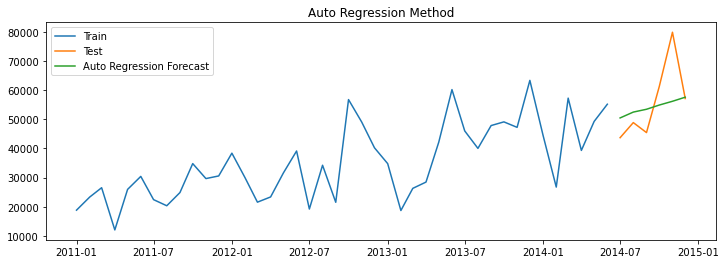

In [79]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'],label='Train')
plt.plot(test['Sales'],label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():],label='Auto Regression Forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

#### Observation:
1. Here, the Green line indicates the Auto Regression method
1. Auto regression method predits the future observation as linear regression of past Sales data.
2. In this case, value of Lag order i.e p is taken as 1


#### Calculate MAPE value

In [80]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(test['Sales'],y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape=np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults=pd.DataFrame({'Method':['Auto Regressive (AR)method'],'MAPE':[mape]})
results=pd.concat([results,tempResults])
results

,Method,MAPE
0,Naive Method,17.47
0,Simple Average Method,34.34
0,Simple Moving Average Method,16.10
0,Simple Exponential Smoothing,15.83
0,HOLT Exponential Forecast,14.67
0,Holt WINTERs Additive Forecast,9.39
0,Holt WINTERs Multiplicative Forecast,10.20
0,Auto Regressive (AR)method,13.56


#### Moving Average(MA) method

In [81]:
model=ARIMA(train_df_boxcox_diff,order=(0,0,1))
model_fit=model.fit()
print(model_fit.params)

const      0.021415
ma.L1.y   -1.000000
dtype: float64


In [82]:
y_hat_ma=df_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff']=model_fit.predict(df_boxcox_diff.index.min(),df_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox']=y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
#Calulating Cumulative sum to Intregrate adn summ of all values
y_hat_ma['ma_forecast_boxcox']=y_hat_ma['ma_forecast_boxcox'].add(df_boxcox[0])
#to do the reverse from BOXCOX to the Original Series.
y_hat_ma['ma_forecast']=np.exp(y_hat_ma['ma_forecast_boxcox'])


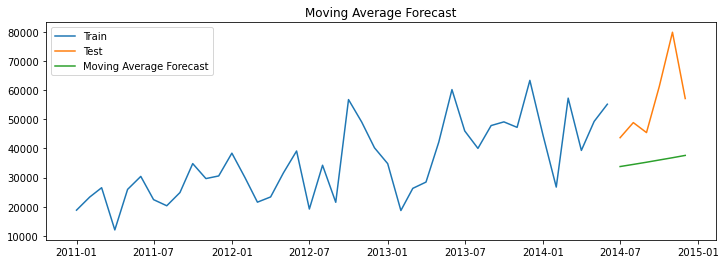

In [83]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'],label='Train')
plt.plot(test['Sales'],label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():],label='Moving Average Forecast')
plt.legend(loc='best')
plt.title('Moving Average Forecast')
plt.show()

#### Observation:
1. Here, the Green line indicates the Moving Average Forecast
2. Moving Average Foreact method predicts the Forecast value ,using the past forecast errors.
3. It has single paramter window size i.e q=1


#### Calculate MAPE value

In [84]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(test['Sales'],y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape=np.round(np.mean(np.abs(test['Sales']-y_hat_ma['ma_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults=pd.DataFrame({'Method':['Moving Average (MA) method'],'MAPE':[mape]})
results=pd.concat([results,tempResults])
results

,Method,MAPE
0,Naive Method,17.47
0,Simple Average Method,34.34
0,Simple Moving Average Method,16.10
0,Simple Exponential Smoothing,15.83
0,HOLT Exponential Forecast,14.67
0,Holt WINTERs Additive Forecast,9.39
0,Holt WINTERs Multiplicative Forecast,10.20
0,Auto Regressive (AR)method,13.56
0,Moving Average (MA) method,33.93


### ARMA(Auto regressive moving average) method

In [85]:
model=ARIMA(train_df_boxcox_diff,order=(1,0,1))
model_fit=model.fit()
print(model_fit.params)

const      0.02147
ar.L1.y    0.07458
ma.L1.y   -1.00000
dtype: float64


#### Recover Original Time Series forcast

In [86]:
y_hat_arma=df_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff']=model_fit.predict(df_boxcox_diff.index.min(),df_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox']=y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
#Calulating Cumulative sum to Intregrate adn summ of all values
y_hat_arma['arma_forecast_boxcox']=y_hat_arma['arma_forecast_boxcox'].add(df_boxcox[0])
#to do the reverse from BOXCOX to the Original Series.
y_hat_arma['arma_forecast']=np.exp(y_hat_arma['arma_forecast_boxcox'])


#### Plot Tran-Test forecast data

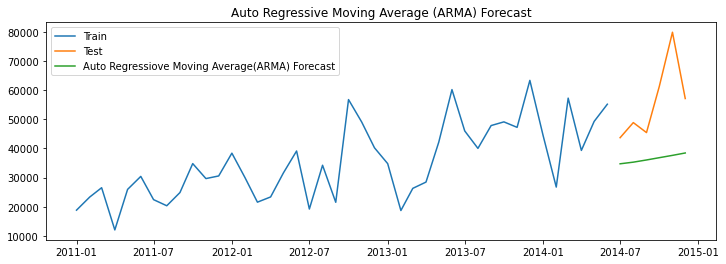

In [87]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'],label='Train')
plt.plot(test['Sales'],label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():],label='Auto Regressiove Moving Average(ARMA) Forecast')
plt.legend(loc='best')
plt.title('Auto Regressive Moving Average (ARMA) Forecast')
plt.show()

#### Observation:
1. Here, the Green line indicates the Auto Regressive Moving Average Forecast
2. ARMA method predicts the Forecast value by combining both AR and MA method.
3. It has tow paramters : Lag Order(p=1) and window size(q=1)

#### Calculate MAPE value

In [88]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(test['Sales'],y_hat_arma['arma_forecast'][test.index.min():])).round(2)
mape=np.round(np.mean(np.abs(test['Sales']-y_hat_arma['arma_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults=pd.DataFrame({'Method':['(ARMA) Auto Regressive Moving Average method'],'MAPE':[mape]})
results=pd.concat([results,tempResults])
results

,Method,MAPE
0,Naive Method,17.47
0,Simple Average Method,34.34
0,Simple Moving Average Method,16.10
0,Simple Exponential Smoothing,15.83
0,HOLT Exponential Forecast,14.67
0,Holt WINTERs Additive Forecast,9.39
0,Holt WINTERs Multiplicative Forecast,10.20
0,Auto Regressive (AR)method,13.56
0,Moving Average (MA) method,33.93
0,(ARMA) Auto Regressive Moving Average method,32.40


### ARIMA(Auto Regressive Integrated Moving Average) method

In [89]:
model=ARIMA(train_df_boxcox,order=(1,1,1))
# here p=1,d=1 and q=1
model_fit=model.fit()
print(model_fit.params)

const        0.02147
ar.L1.D.y    0.07458
ma.L1.D.y   -1.00000
dtype: float64


#### Recover Original TS format

In [90]:
y_hat_arima=df_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff']=model_fit.predict(df_boxcox_diff.index.min(),df_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox']=y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
#Calulating Cumulative sum to Intregrate adn summ of all values
y_hat_arima['arima_forecast_boxcox']=y_hat_arima['arima_forecast_boxcox'].add(df_boxcox[0])
#to do the reverse from BOXCOX to the Original Series.

y_hat_arima['arima_forecast']=np.exp(y_hat_arima['arima_forecast_boxcox'])


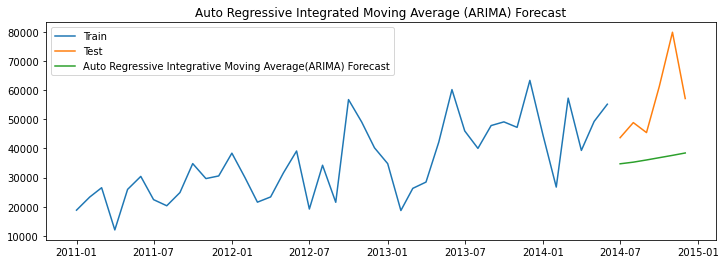

In [91]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'],label='Train')
plt.plot(test['Sales'],label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():],label='Auto Regressive Integrative Moving Average(ARIMA) Forecast')
plt.legend(loc='best')
plt.title('Auto Regressive Integrated Moving Average (ARIMA) Forecast')
plt.show()

#### Observation:
1. Here, the Green line repressnts the ARIMA Forecast.
2. It captures  the Level and trend , but no Seasonality.

#### Calculate MAPE value

In [92]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(test['Sales'],y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape=np.round(np.mean(np.abs(test['Sales']-y_hat_arima['arima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults=pd.DataFrame({'Method':['(ARIMA) Auto Regressive Integrated Moving Average emethod'],'MAPE':[mape]})
results=pd.concat([results,tempResults])
results

,Method,MAPE
0,Naive Method,17.47
0,Simple Average Method,34.34
0,Simple Moving Average Method,16.10
0,Simple Exponential Smoothing,15.83
0,HOLT Exponential Forecast,14.67
0,Holt WINTERs Additive Forecast,9.39
0,Holt WINTERs Multiplicative Forecast,10.20
0,Auto Regressive (AR)method,13.56
0,Moving Average (MA) method,33.93
0,(ARMA) Auto Regressive Moving Average method,32.40


### SARIMA(Seaonal Auto Regressive Integrated Moving Average) model

In [93]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train_df_boxcox,order=(1,1,1,),seasonal_order=(1,1,1,12))
model_fit=model.fit()
print(model_fit.params)

ar.L1      -0.041157
ma.L1      -0.997243
ar.S.L12    0.104227
ma.S.L12   -0.973377
sigma2      0.058197
dtype: float64


#### Recover Origonal TS forecast

In [94]:
y_hat_sarima=df_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox']=model_fit.predict(df_boxcox_diff.index.min(),df_boxcox_diff.index.max())

y_hat_sarima['sarima_forecast']=np.exp(y_hat_sarima['sarima_forecast_boxcox'])


#### Train, test forecast

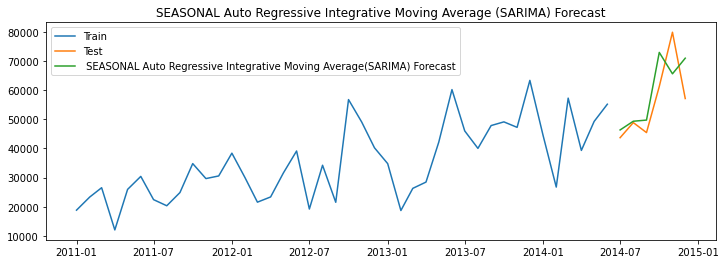

In [95]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'],label='Train')
plt.plot(test['Sales'],label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():],label=' SEASONAL Auto Regressive Integrative Moving Average(SARIMA) Forecast')
plt.legend(loc='best')
plt.title('SEASONAL Auto Regressive Integrative Moving Average (SARIMA) Forecast')
plt.show()

#### Observation:
1. Here, the Green line represent the SARIMA forecast.
2. In the model, all 3 factors: Level, Trend and Seasonality are captured and observed.
3. Forecast valueis observed to be very close to Actual values of next 6 months.


#### Calculate MAPE value

In [96]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(test['Sales'],y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape=np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults=pd.DataFrame({'Method':['(SARIMA)Seasonal Auto Regressive Integrated Moving Average method'],'MAPE':[mape]})
results=pd.concat([results,tempResults])
results

,Method,MAPE
0,Naive Method,17.47
0,Simple Average Method,34.34
0,Simple Moving Average Method,16.10
0,Simple Exponential Smoothing,15.83
0,HOLT Exponential Forecast,14.67
0,Holt WINTERs Additive Forecast,9.39
0,Holt WINTERs Multiplicative Forecast,10.20
0,Auto Regressive (AR)method,13.56
0,Moving Average (MA) method,33.93
0,(ARMA) Auto Regressive Moving Average method,32.40


#### Observation:
1. MAPE value is observed to have least value for SARIMA model amongst all the models.
2. SARIMA model is working best in comparion to the other models as MAPE values is least for it.